## Important metrics and questions HOTEL 2

### Import the libraries

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import datetime

### ADR: average daily rate = rooms revenue / paid rooms
- ADR is a common metric in the hotel industry
- problem: we do not have enough data to calculate it, we miss all the bookings's per days 

### MCPB = marketing cost per booking 


- budget + daily_user tábla
- budget + date_picker tábla
- budget + booking tábla

- További táblák: google cost per click
- össze lehet hasonlítani, hogy melyik hirdetés hoz olcsóbban felhasználó/napi dátumválasztót/foglalást

#### budget + booking table: how much did it cost to get a booking


In [3]:
#budget: marketing spending in EUR by days
budget = pd.read_csv('./../Morgens_notebooks/HOTEL_2/Original_data/daily_ppc_budget_hotel_2.csv', sep=",")
budget.rename(columns = {'Unnamed: 0':'date'}, inplace = True)
budget['date'] = pd.to_datetime(budget['date'])
#Summarize the spending in a new column:
budget['total_spending'] = budget['daily_google_spend'] + budget['daily_microsoft_spend'] + budget['daily_meta_spend']
budget.head(5)

date  daily_google_spend  daily_microsoft_spend  daily_meta_spend  \
0 2024-09-18              136513                   7484             33554   
1 2024-09-19              121423                   5580             41405   
2 2024-09-20              107031                   5964             48341   
3 2024-09-21              109008                   5028             50098   
4 2024-09-22              141350                   4804             57303   

   total_spending  
0          177551  
1          168408  
2          161336  
3          164134  
4          203457

#### Marketing cost per bookings

In [5]:
#booking_count: the number of bookings per days
booking_count = pd.read_csv('./../Morgens_notebooks/HOTEL_2/Clean_data/pivot_booking_count.csv', index_col=[0])

In [7]:
booking_count['total_paid_ count'] =  booking_count['Google'] + booking_count['META'] + booking_count['Microsoft']
booking_count.head(5)

utc_date  0  Google  META  Microsoft  UNPAID  total_paid_ count
0  2024-09-18  5       6     0          2       1                  8
1  2024-09-19  3       8     1          0       3                  9
2  2024-09-20  4       8     0          0       3                  8
3  2024-09-21  2       2     0          0       1                  2
4  2024-09-22  3      11     2          0       0                 13

In [9]:
#Join the budget table to the booking count:
budget_booking_count = pd.concat([budget, booking_count], axis=1 )
budget_booking_count['HUF/booking'] = budget_booking_count['total_spending'] / budget_booking_count['total_paid_ count']
budget_booking_count['HUF/booking'] = budget_booking_count['HUF/booking'].round(1)

budget_booking_count['GOOGLE/booking'] = budget_booking_count['daily_google_spend'] / budget_booking_count['Google']
budget_booking_count['GOOGLE/booking'] = budget_booking_count['GOOGLE/booking'].round(1)

budget_booking_count['Microsoft/booking'] = budget_booking_count['daily_microsoft_spend'] / budget_booking_count['Microsoft']
budget_booking_count['Microsoft/booking'] = budget_booking_count['Microsoft/booking'].round(1)

budget_booking_count['META/booking'] = budget_booking_count['daily_meta_spend'] / budget_booking_count['META']
budget_booking_count['META/booking'] = budget_booking_count['META/booking'].round(1)

In [11]:
budget_booking_count.head(50)

date  daily_google_spend  daily_microsoft_spend  daily_meta_spend  \
0  2024-09-18              136513                   7484             33554   
1  2024-09-19              121423                   5580             41405   
2  2024-09-20              107031                   5964             48341   
3  2024-09-21              109008                   5028             50098   
4  2024-09-22              141350                   4804             57303   
5  2024-09-23              136652                   5892             83731   
6  2024-09-24              101753                   6528             89286   
7  2024-09-25              118891                   3636             94254   
8  2024-09-26              106169                   5900            138779   
9  2024-09-27              104084                   6444            108115   
10 2024-09-28              110116                   4364             73165   
11 2024-09-29              102996                   3880             75505   
12 2024-09-30               98272                   6436             43769   
13 2024-10-01              110950                   4532              9008   
14 2024-10-02              115620                   6572             14979   
15 2024-10-03              105163                   6744             14955   
16 2024-10-04              110390                   6032             14255   
17 2024-10-05              106728                   6292             14808   
18 2024-10-06              120829                   6408             16229   
19 2024-10-07              117100                   7496             15431   
20 2024-10-08              120919                   9356             17734   
21 2024-10-09              129916                   8940             21180   
22 2024-10-10              155691                   9776             24254   
23 2024-10-11              132846                   9876             30110   
24 2024-10-12              120424                   7864             36031   
25 2024-10-13              158141                   9144             38829   
26 2024-10-14              103767                   8068             37419   
27 2024-10-15              113104                   8732             45614   
28 2024-10-16              123896                   8156             42844   
29 2024-10-17               93658                   7936             54892   
30 2024-10-18              112557                   8520             62348   

    total_spending    utc_date  0  Google  META  Microsoft  UNPAID  \
0           177551  2024-09-18  5       6     0          2       1   
1           168408  2024-09-19  3       8     1          0       3   
2           161336  2024-09-20  4       8     0          0       3   
3           164134  2024-09-21  2       2     0          0       1   
4           203457  2024-09-22  3      11     2          0       0   
5           226275  2024-09-23  0       5     0          0       4   
6           197567  2024-09-24  0      10     0          2       0   
7           216781  2024-09-25  4      10     0          0       1   
8           250848  2024-09-26  2       6     0          0       1   
9           218643  2024-09-27  1      11     0          2       0   
10          187645  2024-09-28  2      14     1          0       1   
11          182381  2024-09-29  2      10     0          0       1   
12          148477  2024-09-30  0      11     0          1       0   
13          124490  2024-10-01  1      14     0          0       2   
14          137171  2024-10-02  3      12     1          1       2   
15          126862  2024-10-03  0      16     0          0       1   
16          130677  2024-10-04  1      11     0          1       1   
17          127828  2024-10-05  0       4     0          0       2   
18          143466  2024-10-06  0      13     0          2       4   
19          140027  2024-10-07  1      13     0          1       0   
20          148009  2024-10-08  0       6 

In [19]:
# marketing cost / bookings for the whole period in total:
(budget_booking_count['total_spending'].sum()) / (budget_booking_count['total_paid_ count'].sum()) #12486 HUF / booking in total
# marketing cost / bookings for the whole period by the 3 sources:
budget_booking_count['daily_google_spend'].sum() / budget_booking_count['Google'].sum() #9183 HUF / booking Google
budget_booking_count['daily_microsoft_spend'].sum() / budget_booking_count['Microsoft'].sum() #9653 HUF / booking Microsoft
budget_booking_count['daily_meta_spend'].sum() / budget_booking_count['META'].sum() #241370 HUF / booking META

241370.83333333334

In [21]:
budget_booking_count['daily_meta_spend'].sum()

1448225

In [23]:
budget_booking_count['META'].sum()

6

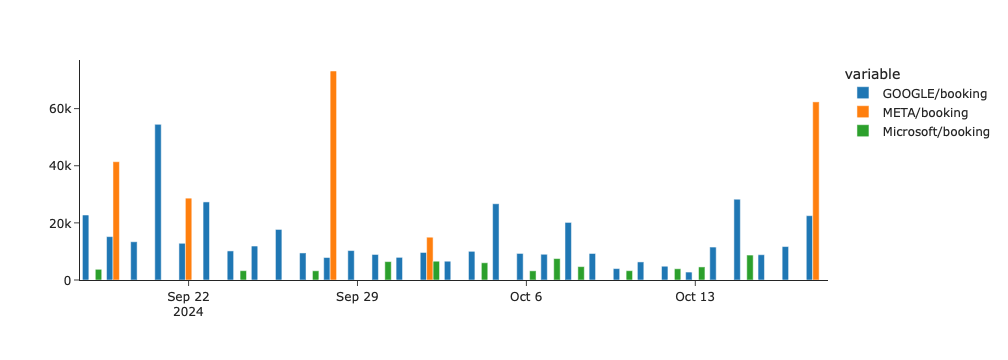

In [25]:
#Visualize it - marketing cost / bookings 
bar = px.bar (budget_booking_count, x='utc_date', y=['GOOGLE/booking', 'META/booking', 'Microsoft/booking'], barmode='group', template = 'simple_white')
bar.update_layout(xaxis_title=None, yaxis_title=None)
bar.show()


In [27]:
#Statistical features of the marketing costs:
budget_booking_count['HUF/booking'].describe()

count       31.000000
mean     19287.867742
std      15500.725920
min       3493.500000
25%       9899.900000
50%      16463.900000
75%      20922.550000
max      82067.000000
Name: HUF/booking, dtype: float64

In [29]:
#Statistical features of the marketing costs:
budget_booking_count['GOOGLE/booking'].describe()

count       31.000000
mean     13925.238710
std      10175.987979
min       2774.400000
25%       8891.750000
50%      10175.300000
75%      16436.350000
max      54504.000000
Name: GOOGLE/booking, dtype: float64

#### Marketing Cost Percentage (MCP)

In [31]:
#booking_sum: the sales of bookings per days
booking_sum= pd.read_csv('./../Morgens_notebooks/HOTEL_2/Clean_data/pivot_booking_sum.csv', index_col=[0])

In [33]:
booking_sum['total_paid_sum'] = booking_sum['Google'] + booking_sum['META'] + booking_sum['Microsoft']
booking_sum.head()

utc_date         0     Google    META  Microsoft    UNPAID  \
0  2024-09-18  683612.6  1144569.7       0   280436.0   62593.0   
1  2024-09-19  785688.9  1978549.0  136598        0.0  736703.1   
2  2024-09-20  904217.2  1085511.1       0        0.0  642174.0   
3  2024-09-21  477060.0   789930.0       0        0.0  168912.0   
4  2024-09-22  555173.0  3402631.0  393202        0.0       0.0   

   total_paid_sum  
0       1425005.7  
1       2115147.0  
2       1085511.1  
3        789930.0  
4       3795833.0

In [35]:
#Join the budget table to the booking sum:
budget_booking_sum = pd.concat([budget, booking_sum], axis=1 )
budget_booking_sum.head(3)

date  daily_google_spend  daily_microsoft_spend  daily_meta_spend  \
0 2024-09-18              136513                   7484             33554   
1 2024-09-19              121423                   5580             41405   
2 2024-09-20              107031                   5964             48341   

   total_spending    utc_date         0     Google    META  Microsoft  \
0          177551  2024-09-18  683612.6  1144569.7       0   280436.0   
1          168408  2024-09-19  785688.9  1978549.0  136598        0.0   
2          161336  2024-09-20  904217.2  1085511.1       0        0.0   

     UNPAID  total_paid_sum  
0   62593.0       1425005.7  
1  736703.1       2115147.0  
2  642174.0       1085511.1

In [37]:
#Calculate columns:
budget_booking_sum['percent_total'] = budget_booking_sum['total_spending'] / budget_booking_sum['total_paid_sum']*100
budget_booking_sum['percent_total'] = budget_booking_sum['percent_total'].round(0)

budget_booking_sum['percent_GOOGLE'] = budget_booking_sum['daily_google_spend'] / budget_booking_sum['Google']*100
budget_booking_sum['percent_GOOGLE'] = budget_booking_sum['percent_GOOGLE'].round(0)

budget_booking_sum['percent_Microsoft'] = budget_booking_sum['daily_microsoft_spend'] / budget_booking_sum['Microsoft']*100
budget_booking_sum['percent_Microsoft'] = budget_booking_sum['percent_Microsoft'].round(0)

budget_booking_sum['percent_META'] = budget_booking_sum['daily_meta_spend'] / budget_booking_sum['META']*100
budget_booking_sum['percent_META'] = budget_booking_sum['percent_META'].round(0)

In [39]:
budget_booking_sum.head()

date  daily_google_spend  daily_microsoft_spend  daily_meta_spend  \
0 2024-09-18              136513                   7484             33554   
1 2024-09-19              121423                   5580             41405   
2 2024-09-20              107031                   5964             48341   
3 2024-09-21              109008                   5028             50098   
4 2024-09-22              141350                   4804             57303   

   total_spending    utc_date         0     Google    META  Microsoft  \
0          177551  2024-09-18  683612.6  1144569.7       0   280436.0   
1          168408  2024-09-19  785688.9  1978549.0  136598        0.0   
2          161336  2024-09-20  904217.2  1085511.1       0        0.0   
3          164134  2024-09-21  477060.0   789930.0       0        0.0   
4          203457  2024-09-22  555173.0  3402631.0  393202        0.0   

     UNPAID  total_paid_sum  percent_total  percent_GOOGLE  percent_Microsoft  \
0   62593.0       1425005.7           12.0            12.0                3.0   
1  736703.1       2115147.0            8.0             6.0                inf   
2  642174.0       1085511.1           15.0            10.0                inf   
3  168912.0        789930.0           21.0            14.0                inf   
4       0.0       3795833.0            5.0             4.0                inf   

   percent_META  
0           inf  
1          30.0  
2           inf  
3           inf  
4          15.0

In [47]:
# marketing cost / bookings for the whole period in total:
budget_booking_sum['total_spending'].sum() / budget_booking_sum['total_paid_sum'].sum() * 100 #6,74%
# marketing cost / bookings for the whole period by the 3 sources:
budget_booking_sum['daily_google_spend'].sum() / budget_booking_sum['Google'].sum() * 100 #4,98% Google
budget_booking_sum['daily_microsoft_spend'].sum() / budget_booking_sum['Microsoft'].sum() * 100 #4,78% Microsoft
budget_booking_sum['daily_meta_spend'].sum() / budget_booking_sum['META'].sum() * 100 #125% META

125.45859340145277

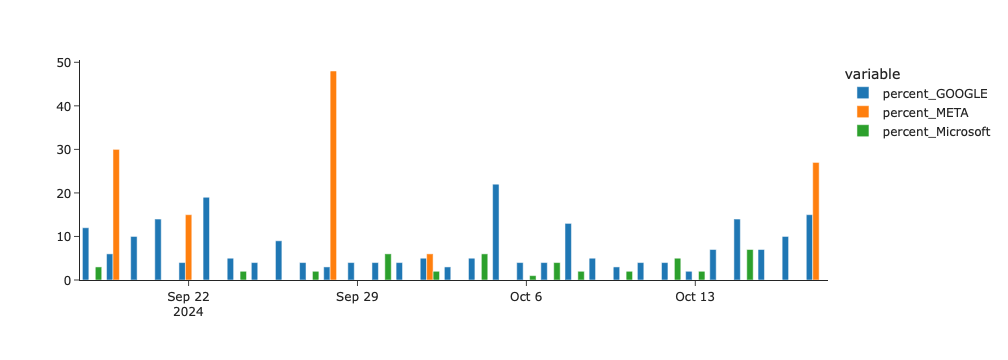

In [49]:
#Visualize it - marketing cost percentage
bar = px.bar (budget_booking_sum, x='utc_date',
              y=['percent_GOOGLE', 'percent_META', 'percent_Microsoft'],
              barmode='group',
              template = 'simple_white')
bar.update_layout(xaxis_title=None, yaxis_title=None)
bar.show()


## Average length of stay == nights


In [70]:
#search_EUR - nights
search_EUR = pd.read_csv('./../Morgens_notebooks/HOTEL_2/Original_data/search_EUR.csv', index_col=[0])

In [72]:
#New column: number of total guests
search_EUR['total_guests'] = search_EUR['adults'] + search_EUR['children']
#Categorize the number of total guests into 4 categories:
#family with/without children, family or group: group is equal or larger than 10 guest
#small family = 4 members in the family, large family = more than 4 members in the family

In [74]:
#Categorize the number of guests
search_EUR['guest_category'] = 'not_known'

In [76]:
search_EUR

id  search_log_session_id         utc_datetime lang_code currency  \
0      76541                   2531  2024-09-18 01:31:42        hu      HUF   
1      76542                   2532  2024-09-18 02:23:53        de      EUR   
2      76543                   2533  2024-09-18 03:07:46        hu      HUF   
3      76544                   2534  2024-09-18 03:14:17        de      EUR   
4      76545                   2535  2024-09-18 03:15:30        hu      HUF   
...      ...                    ...                  ...       ...      ...   
15718  98919                  18317  2024-10-18 21:29:37        hu      HUF   
15719  98920                  18317  2024-10-18 21:30:04        hu      HUF   
15720  98921                  18317  2024-10-18 21:31:03        hu      HUF   
15721  98922                  18317  2024-10-18 21:31:19        hu      HUF   
15722  98923                  18317  2024-10-18 21:33:34        hu      HUF   

          arrival   departure  days  nights  adults  ...  total_price_final  \
0      2024-10-08  2024-10-12     5       4       2  ...                0.0   
1      2024-10-11  2024-10-13     3       2       2  ...                0.0   
2      2024-11-14  2024-11-17     4       3       2  ...                0.0   
3      2024-10-11  2024-10-13     3       2       2  ...                0.0   
4      2024-11-14  2024-11-15     2       1       2  ...                0.0   
...           ...         ...   ...     ...     ...  ...                ...   
15718  2024-12-26  2024-12-29     4       3       2  ...                0.0   
15719  2024-12-26  2024-12-28     3       2       2  ...                0.0   
15720  2024-12-26  2024-12-29     4       3       2  ...                0.0   
15721  2024-12-26  2024-12-30     5       4       2  ...                0.0   
15722  2024-12-16  2024-12-20     5       4       2  ...                0.0   

         utc_date  Rate_EUR Date_EUR_HUF  total_price_HUF lead_time  \
0      2024-09-18    394.47   2024-09-18              0.0   20 days   
1      2024-09-18    394.47   2024-09-18              0.0   23 days   
2      2024-09-18    394.47   2024-09-18              0.0   57 days   
3      2024-09-18    394.47   2024-09-18              0.0   23 days   
4      2024-09-18    394.47   2024-09-18              0.0   57 days   
...           ...       ...          ...              ...       ...   
15718  2024-10-18    400.05   2024-10-18              0.0   69 days   
15719  2024-10-18    400.05   2024-10-18              0.0   69 days   
15720  2024-10-18    400.05   2024-10-18              0.0   69 days   
15721  2024-10-18    400.05   2024-10-18              0.0   69 days   
15722  2024-10-18    400.05   2024-10-18              0.0   59 days   

       lead_time_days lead_time_numbers  total_guests  guest_category  
0                  20  1728000000000000             2       not_known  
1                  23  1987200000000000             2       not_known  
2                  57  4924800000000000             5       not_known  
3                  23  1987200000000000             2       not_known  
4                  57  4924800000000000             5       not_known  
...               ...               ...           ...             ...  
15718              69  5961600000000000             4       not_known  
15719              69  5961600000000000             4       not_known  
15720              69  5961600000000000             4       not_known  
15721              69  5961600000000000             4       not_known  
15722              59  5097600000000000             4       not_known  

[15723 rows x 22 columns]

In [78]:
for i in range(len(search_EUR)):
    if (search_EUR.iloc[i, 20] >= 10) & (search_EUR.iloc[i, 10] == 0): #guests are more than 10 guests without children
        search_EUR.iloc[i, 21] = 'group without children'
        
    elif (search_EUR.iloc[i, 20] >= 10) & (search_EUR.iloc[i, 10] != 0): #guests are more than 10 guests with children
        search_EUR.iloc[i, 21] = 'group with children'
        
    elif (search_EUR.iloc[i, 20] < 5) & (search_EUR.iloc[i, 10] == 0): #family is less than 10 guests without children
        search_EUR.iloc[i, 21] = 'small family without children'

    elif (search_EUR.iloc[i, 20] < 5) & (search_EUR.iloc[i, 10] != 0): #family is less than 10 guests with children
        search_EUR.iloc[i, 21] = 'small family with children'

    elif (search_EUR.iloc[i, 20] < 10) & (search_EUR.iloc[i, 20] >= 5) & (search_EUR.iloc[i, 10] == 0): #family is less than 10 guests without children
        search_EUR.iloc[i, 21] = 'large family without children'

    elif (search_EUR.iloc[i, 20] < 10) & (search_EUR.iloc[i, 20] >= 5) & (search_EUR.iloc[i, 10] != 0): #family is less than 10 guests with children
        search_EUR.iloc[i, 21] = 'large family with children'
        

In [80]:
search_EUR.head(5)

id  search_log_session_id         utc_datetime lang_code currency  \
0  76541                   2531  2024-09-18 01:31:42        hu      HUF   
1  76542                   2532  2024-09-18 02:23:53        de      EUR   
2  76543                   2533  2024-09-18 03:07:46        hu      HUF   
3  76544                   2534  2024-09-18 03:14:17        de      EUR   
4  76545                   2535  2024-09-18 03:15:30        hu      HUF   

      arrival   departure  days  nights  adults  ...  total_price_final  \
0  2024-10-08  2024-10-12     5       4       2  ...                0.0   
1  2024-10-11  2024-10-13     3       2       2  ...                0.0   
2  2024-11-14  2024-11-17     4       3       2  ...                0.0   
3  2024-10-11  2024-10-13     3       2       2  ...                0.0   
4  2024-11-14  2024-11-15     2       1       2  ...                0.0   

     utc_date  Rate_EUR Date_EUR_HUF  total_price_HUF lead_time  \
0  2024-09-18    394.47   2024-09-18              0.0   20 days   
1  2024-09-18    394.47   2024-09-18              0.0   23 days   
2  2024-09-18    394.47   2024-09-18              0.0   57 days   
3  2024-09-18    394.47   2024-09-18              0.0   23 days   
4  2024-09-18    394.47   2024-09-18              0.0   57 days   

   lead_time_days lead_time_numbers  total_guests  \
0              20  1728000000000000             2   
1              23  1987200000000000             2   
2              57  4924800000000000             5   
3              23  1987200000000000             2   
4              57  4924800000000000             5   

                  guest_category  
0  small family without children  
1  small family without children  
2     large family with children  
3  small family without children  
4     large family with children  

[5 rows x 22 columns]

In [92]:
len(search_EUR[search_EUR['guest_category'] == 'group with children']) #41
len(search_EUR[search_EUR['guest_category'] == 'group without children']) #25
len(search_EUR[search_EUR['guest_category'] == 'small family with children']) #4829
len(search_EUR[search_EUR['guest_category'] == 'small family without children']) #9679
len(search_EUR[search_EUR['guest_category'] == 'large family with children']) #996
len(search_EUR[search_EUR['guest_category'] == 'large family without children']) #153


153

In [98]:
search_EUR['adults'].describe() #between 1 and 20, most common is 2
search_EUR['children'].describe() #between 1 and 9, most common 0

count    15723.000000
mean         0.608344
std          0.910028
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          9.000000
Name: children, dtype: float64

In [100]:
search_EUR['nights'].describe()

count    15723.000000
mean         2.486294
std          1.250513
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         35.000000
Name: nights, dtype: float64

In [104]:
len(search_EUR[search_EUR['nights'] == 0]) #there are 155 rows where the arrival and departure date are equal
search_EUR[ (search_EUR['nights'] == 0) & (search_EUR['conversion'] == 1) ] #empty df, of course there is no Booking like that

Empty DataFrame
Columns: [id, search_log_session_id, utc_datetime, lang_code, currency, arrival, departure, days, nights, adults, children, conversion, total_price_final, utc_date, Rate_EUR, Date_EUR_HUF, total_price_HUF, lead_time, lead_time_days, lead_time_numbers, total_guests, guest_category]
Index: []

[0 rows x 22 columns]

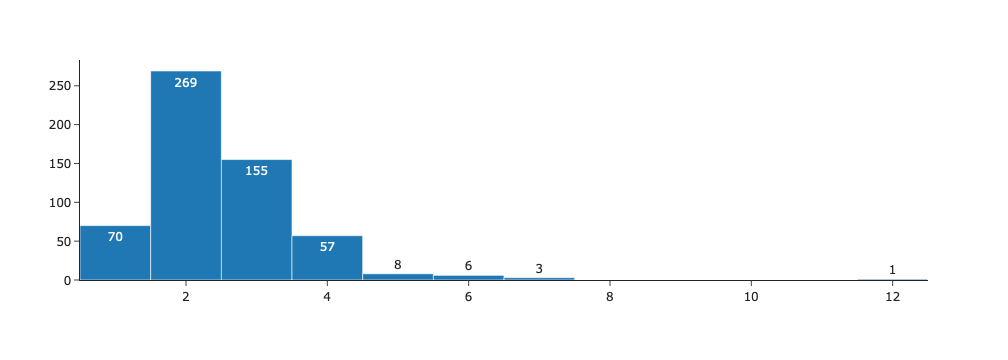

In [106]:
#BOOKINGS
#Visualize the distribution of nights by histogram in plotly
import plotly.express as px
fig = px.histogram(search_EUR[search_EUR['conversion'] == 1], x='nights', template='simple_white', text_auto=True)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

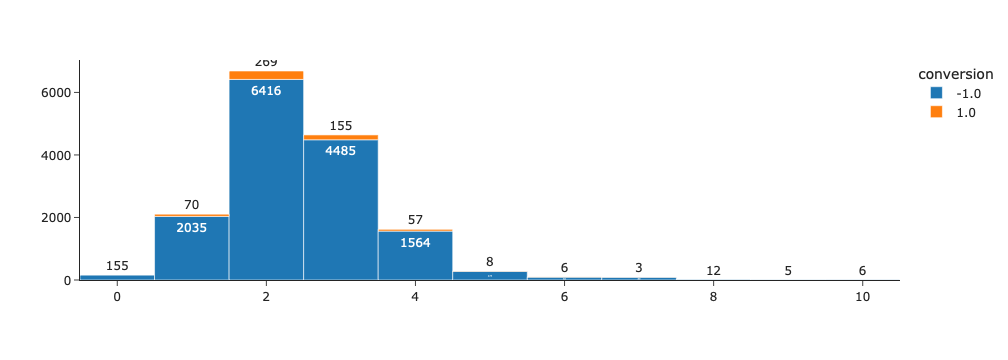

In [108]:
#ALL SEARCH
#Visualize the distribution of nights by conversion
import plotly.express as px
fig = px.histogram(search_EUR[search_EUR['nights'] <= 10], x='nights', color='conversion', template='simple_white', text_auto=True, nbins=20)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()


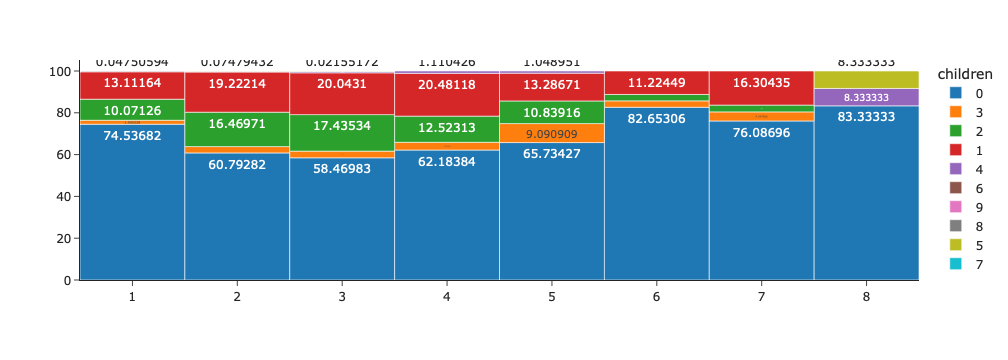

In [110]:
# ALL SEARCH
#Visualize the distribution of nights by the number of children 
df = search_EUR[ (search_EUR['nights'] != 0) & (search_EUR['nights'] <= 8) ]
import plotly.express as px
fig = px.histogram(df,
                   x='nights',
                   color='children',
                   template='simple_white',
                   barnorm='percent', 
                   text_auto=True,
                   nbins=14)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

#Result: the ratio of the guests wo children go down by the 3rd day than it increases back

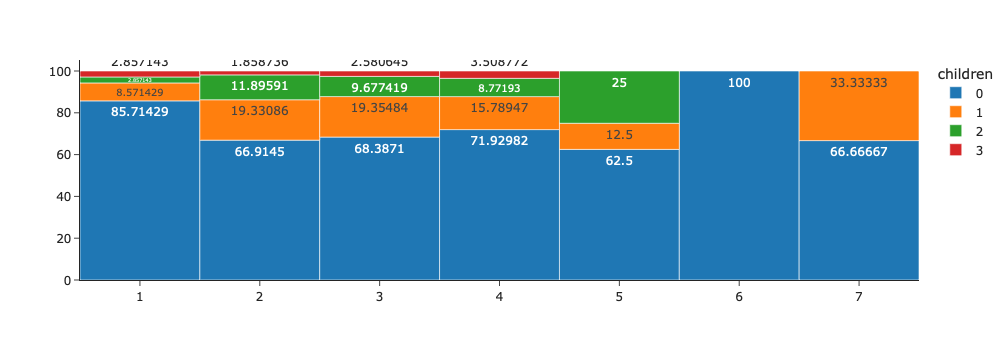

In [113]:
#ONLY THE BOOKINGS
#Visualize the distribution of nights by the number of children -
df = search_EUR[ (search_EUR['nights'] != 0) & (search_EUR['nights'] <= 8) & (search_EUR['conversion'] == 1)]
import plotly.express as px
fig = px.histogram(df,
                   x='nights',
                   color='children',
                   template='simple_white',
                   barnorm='percent', 
                   text_auto=True,
                   nbins=12)
fig.update_layout(xaxis_title=None, yaxis_title=None)

fig.show()

#The guests with children are searching for longer periods, but are booking for shorter, they do not stay longer than 5 nights

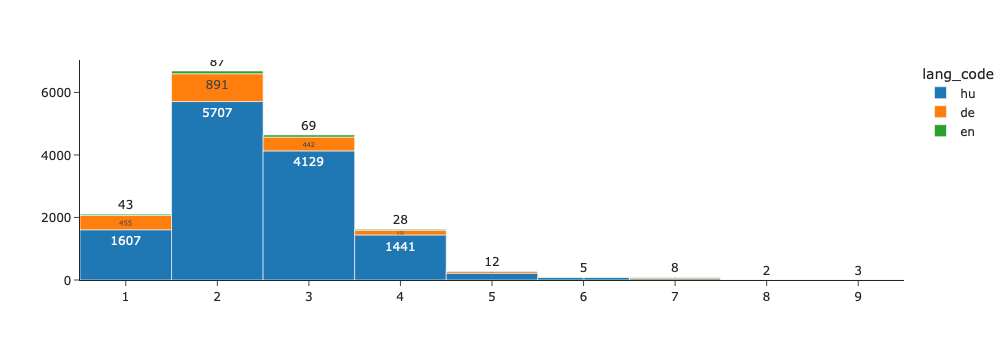

In [115]:
#ALL SEARCH
#Visualize the distribution of nights: split by hu/de/en 
df = search_EUR[ (search_EUR['nights'] != 0) & (search_EUR['nights'] <= 9) ]
import plotly.express as px
fig = px.histogram(df,
                   x='nights',
                   color='lang_code',
                   template='simple_white',
                   #barnorm='percent', 
                   text_auto=True,
                   nbins=14)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

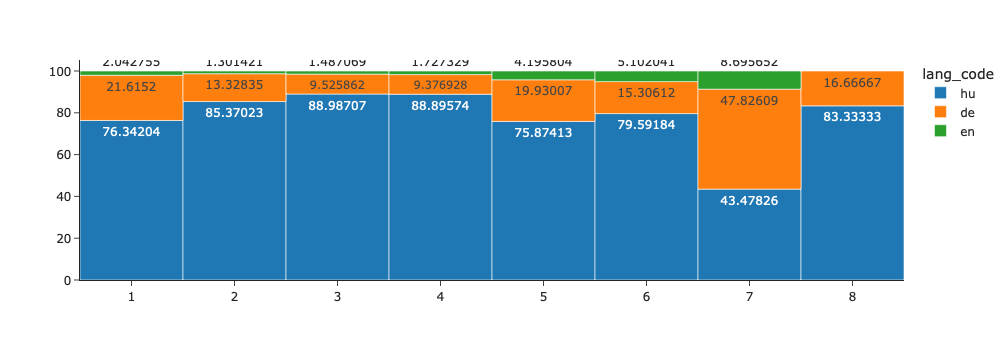

In [117]:
#  ALL SEARCH
#Visualize the searches by distribution of nights: split by hu/de/en ALL SEARCH
df = search_EUR[ (search_EUR['nights'] != 0) & (search_EUR['nights'] <= 8) ]
import plotly.express as px
fig = px.histogram(df,
                   x='nights',
                   color='lang_code',
                   template='simple_white',
                   barnorm='percent', 
                   text_auto=True,
                   nbins=14)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

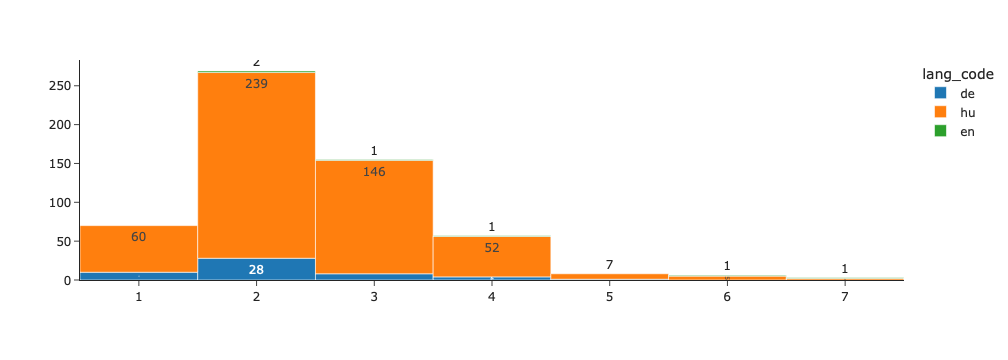

In [119]:
#ONLY BOOKINGS
#Visualize the distribution of nights: split by hu/de/en 
df = search_EUR[ (search_EUR['nights'] != 0) & (search_EUR['nights'] <= 9) & (search_EUR['conversion'] == 1)]
import plotly.express as px
fig = px.histogram(df,
                   x='nights',
                   color='lang_code',
                   template='simple_white',
                   #barnorm='percent', 
                   text_auto=True,
                   nbins=12)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

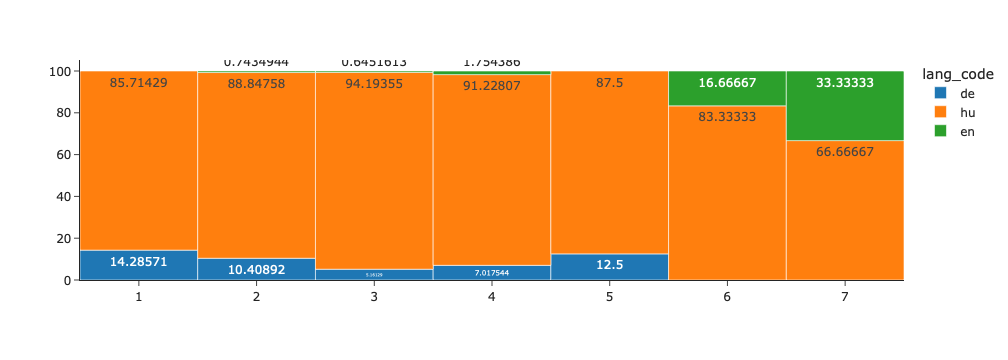

In [121]:
#ONLY BOOKINGS
#Visualize the distribution of nights: split by hu/de/en 
df = search_EUR[ (search_EUR['nights'] != 0) & (search_EUR['nights'] <= 9) & (search_EUR['conversion'] == 1)]
import plotly.express as px
fig = px.histogram(df,
                   x='nights',
                   color='lang_code',
                   template='simple_white',
                   barnorm='percent', 
                   text_auto=True,
                   nbins=12)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

#for the 1-2-3 nights the ratio of HU / non_HU is almost the same, but for longer periods the ratio of non_HU is increasing,
#but its the minority of the bookings

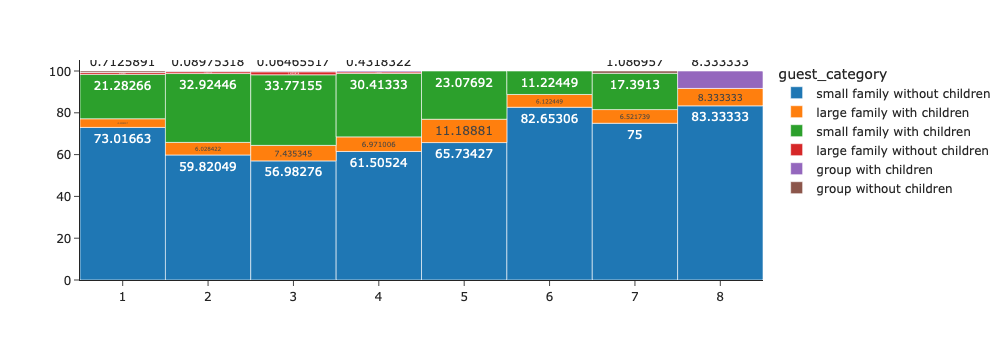

In [123]:
#  ALL SEARCH
#Visualize the searches by distribution of nights: split by number of guests
df = search_EUR[ (search_EUR['nights'] != 0) & (search_EUR['nights'] <= 8) ]
import plotly.express as px
fig = px.histogram(df,
                   x='nights',
                   color='guest_category',
                   template='simple_white',
                   barnorm='percent', 
                   text_auto=True,
                   nbins=14)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

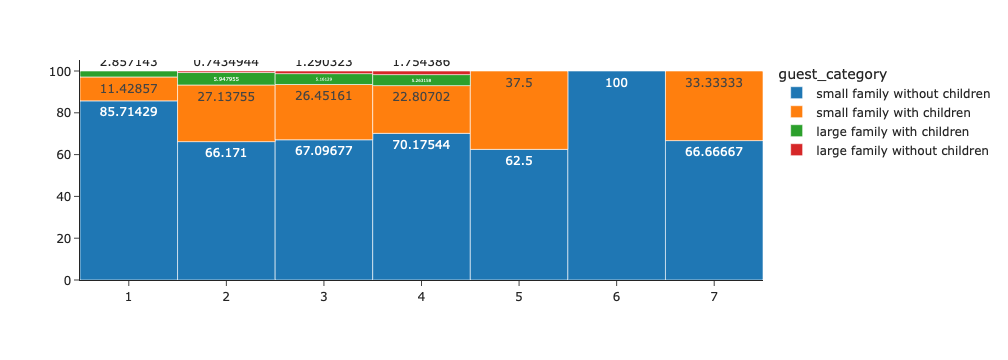

In [125]:
#  BOOKINGS
#Visualize the searches by distribution of nights: split by number of guests
df = search_EUR[ (search_EUR['nights'] != 0) & (search_EUR['nights'] <= 8) & (search_EUR['conversion'] == 1)]
import plotly.express as px
fig = px.histogram(df,
                   x='nights',
                   color='guest_category',
                   template='simple_white',
                   barnorm='percent', 
                   text_auto=True,
                   nbins=12)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

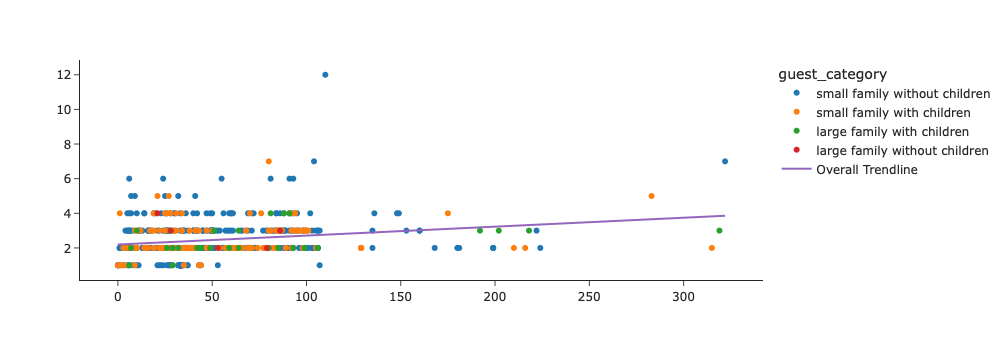

In [127]:
#Question: Do people plan their longer holidays further in advance compared to shorter holidays?
#Visualize : number of nights vs lead time when bookings realized
df = search_EUR[search_EUR['conversion'] == 1]
import plotly.express as px
fig = px.scatter(df, x='lead_time_days', y='nights', trendline="ols", trendline_scope="overall",
                   color='guest_category',
                   template='simple_white',
                   #barnorm='percent', 
                   #text_auto=True,
                   )
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

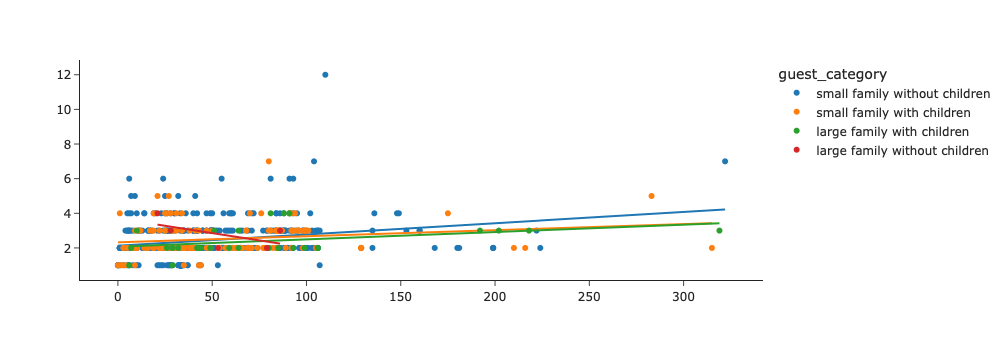

In [129]:
#Question: Do people plan their longer holidays further in advance compared to shorter holidays?
#Visualize : number of nights vs lead time when bookings realized
df = search_EUR[search_EUR['conversion'] == 1]
import plotly.express as px
fig = px.scatter(df, x='lead_time_days', y='nights', trendline="ols",
                   color='guest_category',
                   template='simple_white',
                   #barnorm='percent', 
                   #text_auto=True,
                   )
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

#THe groups with children tend to plan their holidays between 50-150 days and the trend: for longer stay longer lead time
#BUT large family without children reverse tendency - should be adults

### Average number of guests per booking


In [131]:
#The average number of guest per search: 2.79
search_EUR['total_guests'].sum() / len(search_EUR)

2.792914838135216

In [133]:
# The average number of guest per booking: 1.86
search_EUR[search_EUR['conversion'] == 1]['total_guests'].sum() / 802

1.8615960099750624

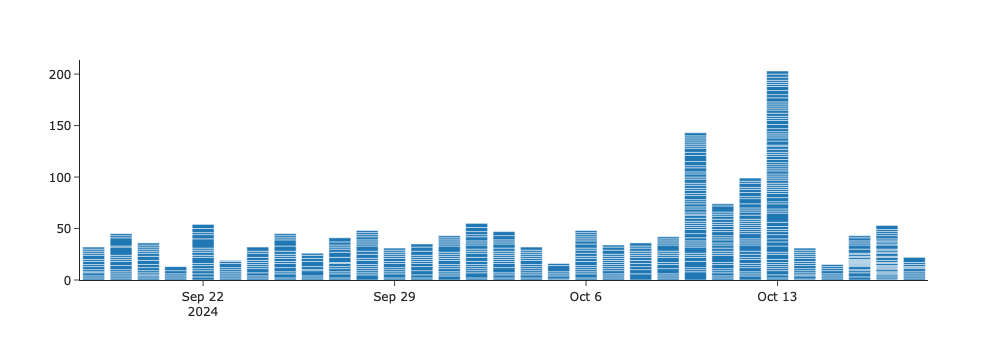

In [135]:
df = search_EUR[search_EUR['conversion'] == 1]
bar = px.bar (df, x='utc_date', y='total_guests', barmode='group', template = 'simple_white')
bar.update_layout(xaxis_title=None, yaxis_title=None)
bar.show()

In [137]:
data = search_EUR[search_EUR['conversion'] == 1]
data_1 = data[['utc_date', 'total_guests']].groupby('utc_date').sum().reset_index()


In [139]:
data2 = search_EUR[search_EUR['conversion'] == 1]
data_2 = data2[['utc_date', 'arrival']].groupby('utc_date').count().reset_index()


In [141]:
#Merge the 2 aggregated tables:
avg_guests = pd.concat([data_1, data_2], axis=1)
avg_guests['avg_guests_daily'] = avg_guests['total_guests'] / avg_guests['arrival']

In [143]:
avg_guests.columns

Index(['utc_date', 'total_guests', 'utc_date', 'arrival', 'avg_guests_daily'], dtype='object')

In [145]:
avg_guests.columns = ['date', 'total_guests', 'utc_date', 'bookings', 'avg_guests_daily']

In [147]:
avg_guests

date  total_guests    utc_date  bookings  avg_guests_daily
0   2024-09-18            32  2024-09-18        14          2.285714
1   2024-09-19            45  2024-09-19        15          3.000000
2   2024-09-20            36  2024-09-20        15          2.400000
3   2024-09-21            13  2024-09-21         5          2.600000
4   2024-09-22            54  2024-09-22        16          3.375000
5   2024-09-23            19  2024-09-23         9          2.111111
6   2024-09-24            32  2024-09-24        12          2.666667
7   2024-09-25            45  2024-09-25        15          3.000000
8   2024-09-26            26  2024-09-26         9          2.888889
9   2024-09-27            41  2024-09-27        14          2.928571
10  2024-09-28            48  2024-09-28        18          2.666667
11  2024-09-29            31  2024-09-29        13          2.384615
12  2024-09-30            35  2024-09-30        12          2.916667
13  2024-10-01            43  2024-10-01        17          2.529412
14  2024-10-02            55  2024-10-02        19          2.894737
15  2024-10-03            47  2024-10-03        17          2.764706
16  2024-10-04            32  2024-10-04        14          2.285714
17  2024-10-05            16  2024-10-05         6          2.666667
18  2024-10-06            48  2024-10-06        19          2.526316
19  2024-10-07            34  2024-10-07        15          2.266667
20  2024-10-08            36  2024-10-08        12          3.000000
21  2024-10-09            42  2024-10-09        15          2.800000
22  2024-10-10           143  2024-10-10        50          2.860000
23  2024-10-11            74  2024-10-11        27          2.740741
24  2024-10-12            99  2024-10-12        35          2.828571
25  2024-10-13           203  2024-10-13        72          2.819444
26  2024-10-14            31  2024-10-14        15          2.066667
27  2024-10-15            15  2024-10-15         7          2.142857
28  2024-10-16            43  2024-10-16        22          1.954545
29  2024-10-17            53  2024-10-17        30          1.766667
30  2024-10-18            22  2024-10-18        10          2.200000

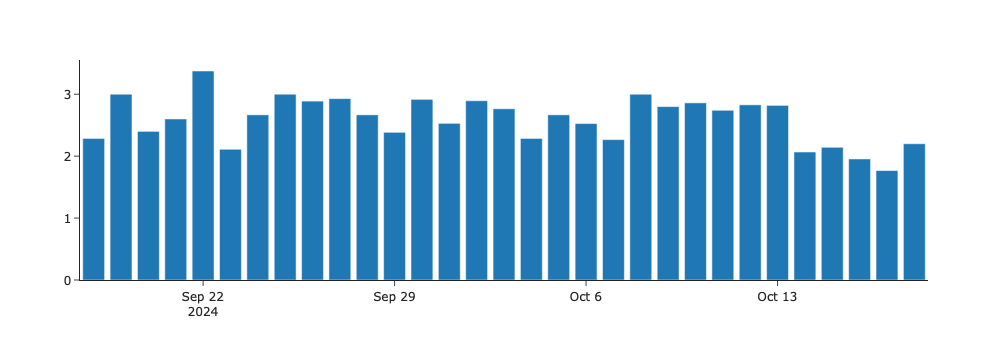

In [149]:
#Average number of guests per bookings by days
df = avg_guests
bar = px.bar (df, x='utc_date', y='avg_guests_daily', barmode='group', template = 'simple_white')
bar.update_layout(xaxis_title=None, yaxis_title=None)
bar.show()

### What periods were searched for during this time period?

In [64]:
search_EUR.iloc[:, 8:18].head()

nights  adults  children  conversion  total_price_final    utc_date  \
0       4       2         0        -1.0                0.0  2024-09-18   
1       1       2         0        -1.0                0.0  2024-09-18   
2       1       2         0        -1.0                0.0  2024-09-18   
3       2       2         0        -1.0                0.0  2024-09-18   
4       4       2         0        -1.0                0.0  2024-09-18   

   Rate_EUR Date_EUR_HUF  total_price_HUF lead_time  
0    394.47   2024-09-18              0.0   20 days  
1    394.47   2024-09-18              0.0    0 days  
2    394.47   2024-09-18              0.0   17 days  
3    394.47   2024-09-18              0.0   30 days  
4    394.47   2024-09-18              0.0   25 days

In [65]:
search_EUR.iloc[0,11]

-1.0

In [151]:
search_EUR['arrival'] = pd.to_datetime(search_EUR['arrival'])

In [153]:
#Collect the dates which were searched for
dates = []
for i in range(len(search_EUR)):
    if search_EUR.iloc[i, 8] == 1:
        dates.append(search_EUR.iloc[i, 5])
    elif search_EUR.iloc[i, 8] > 1:
        dates.append(search_EUR.iloc[i, 5])
        x = search_EUR.iloc[i, 8]
        for j in range(1, x):
            dates.append(search_EUR.iloc[i, 5] + pd.Timedelta(days=j))

In [155]:
len(dates) #39092 dates were searched

39092

In [157]:
dates_df = pd. DataFrame(dates, columns = ['dates'])

In [159]:
dates_df.head()

dates
0 2024-10-08
1 2024-10-09
2 2024-10-10
3 2024-10-11
4 2024-10-11

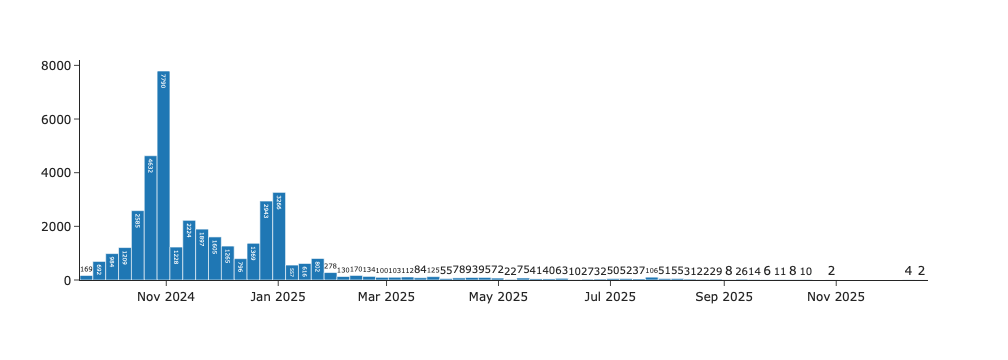

In [161]:
#ALL SEARCH
#Visualize the distribution of these dates

import plotly.express as px
fig = px.histogram(dates_df,
                   x='dates',
                   
                   template='simple_white',
                    
                   text_auto=True,
                   nbins=120)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

In [165]:
search_bookings = search_EUR[search_EUR['conversion'] == 1] #569 bookings

In [169]:
search_bookings.head(1)

id  search_log_session_id         utc_datetime lang_code currency  \
118  76659                   2612  2024-09-18 08:12:46        de      EUR   

       arrival   departure  days  nights  adults  ...  total_price_final  \
118 2025-02-14  2025-02-18     5       4       2  ...              510.0   

       utc_date  Rate_EUR Date_EUR_HUF  total_price_HUF lead_time  \
118  2024-09-18    394.47   2024-09-18         201179.7  149 days   

     lead_time_days  lead_time_numbers  total_guests  \
118             149  12873600000000000             2   

                    guest_category  
118  small family without children  

[1 rows x 22 columns]

In [171]:
#BOOKINGS
#Collect the dates which were booked for
book_dates = []
for i in range(len(search_bookings)):
    if search_bookings.iloc[i, 8] == 1:
        book_dates.append(search_bookings.iloc[i, 5])
    elif search_bookings.iloc[i, 8] > 1:
        book_dates.append(search_bookings.iloc[i, 5])
        x = search_bookings.iloc[i, 8]
        for j in range(1, x):
            book_dates.append(search_bookings.iloc[i, 5] + pd.Timedelta(days=j))

In [173]:
len(book_dates) #1410 nights were booked

1410

In [175]:
booking_dates_df = pd. DataFrame(book_dates, columns = ['dates'])

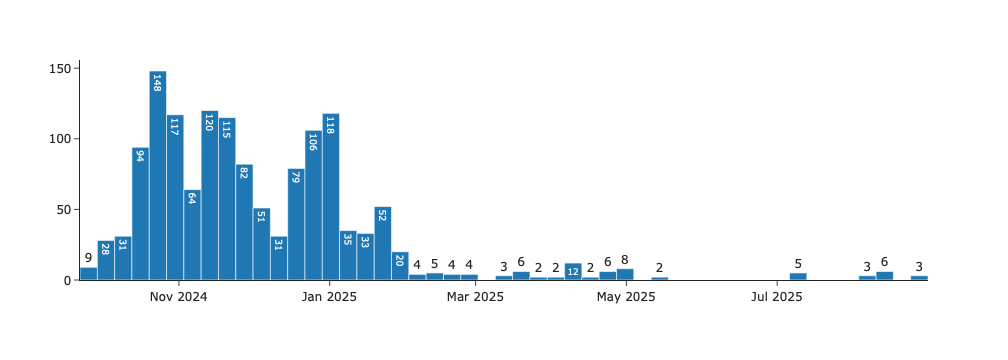

In [177]:
#BOOKINGS - WEEKS
#Visualize the distribution of these bookings - bin size = 80 means one bin is equal one week

import plotly.express as px
fig = px.histogram(booking_dates_df,
                   x='dates',
                   #color='guest_category',
                   template='simple_white',
                   #barnorm='percent', 
                   text_auto=True,
                   nbins=80)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

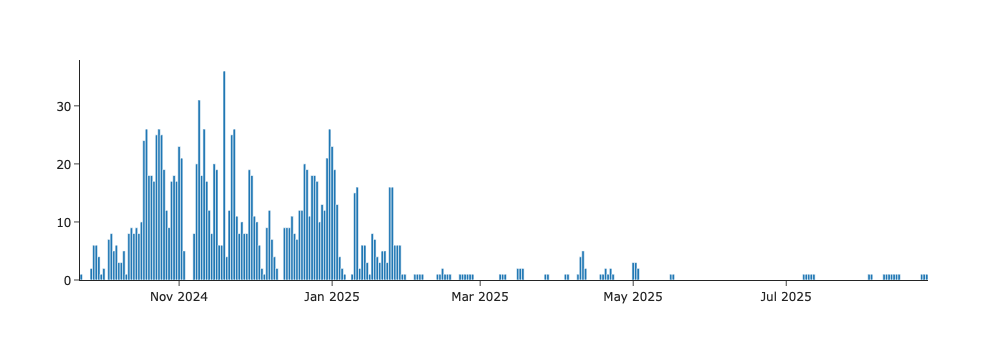

In [179]:
#BOOKINGS - DAYS
#Visualize the distribution of these bookings - bin size = 400 means one bin is one week

import plotly.express as px
fig = px.histogram(booking_dates_df,
                   x='dates',
                   #color='guest_category',
                   template='simple_white',
                   #barnorm='percent', 
                   #text_auto=True,
                   nbins=400)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

#This granularity shows better the weekends peaks, where weekend means Friday/Saturday nights

In [181]:
#booking_dates_df
booking_dates_df.head()
booking_dates_df['count'] = 1
booking_dates_df.groupby('dates').count().head(20)

count
dates            
2024-09-23      1
2024-09-27      2
2024-09-28      6
2024-09-29      6
2024-09-30      4
2024-10-01      1
2024-10-02      2
2024-10-04      7
2024-10-05      8
2024-10-06      5
2024-10-07      6
2024-10-08      3
2024-10-09      3
2024-10-10      5
2024-10-11      1
2024-10-12      8
2024-10-13      9
2024-10-14      8
2024-10-15      9
2024-10-16      8

In [183]:
#occupancy table! here
occupancy = pd.read_csv('./../Morgens_notebooks/HOTEL_2/Original_data/daily_occupancy_hotel_2.csv', sep=";")
occupancy['recording_date'] = pd.to_datetime(occupancy['recording_date'])
occupancy['subject_date'] = pd.to_datetime(occupancy['subject_date'])
occupancy.tail()

recording_date subject_date  fill_rate
10783     2024-10-18   2025-08-27        0.8
10784     2024-10-18   2025-08-28        0.8
10785     2024-10-18   2025-08-29        0.8
10786     2024-10-18   2025-08-30        0.8
10787     2024-10-18   2025-08-31        0.8

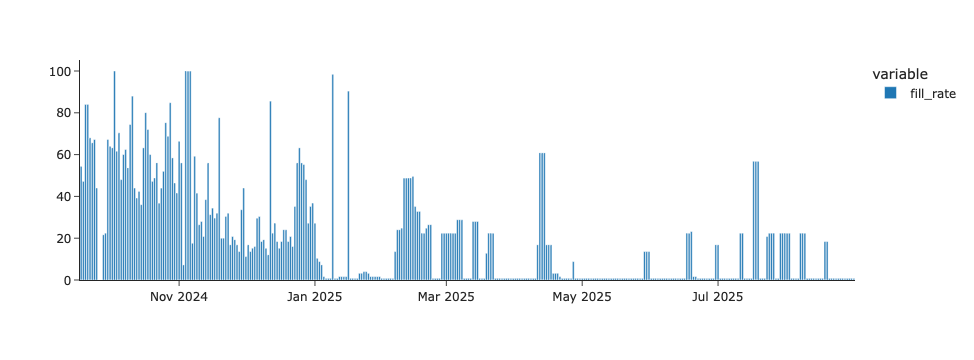

In [185]:
#Show me the occupancy rate in the first day of the period, on 2024-09-18
df = occupancy[['subject_date', 'fill_rate']].iloc[0:348, :]
df
#Visualize
bar = px.bar (df, x = 'subject_date', y=['fill_rate'],  template = 'simple_white')

bar.update_layout(xaxis_title=None, yaxis_title=None)

bar.show()

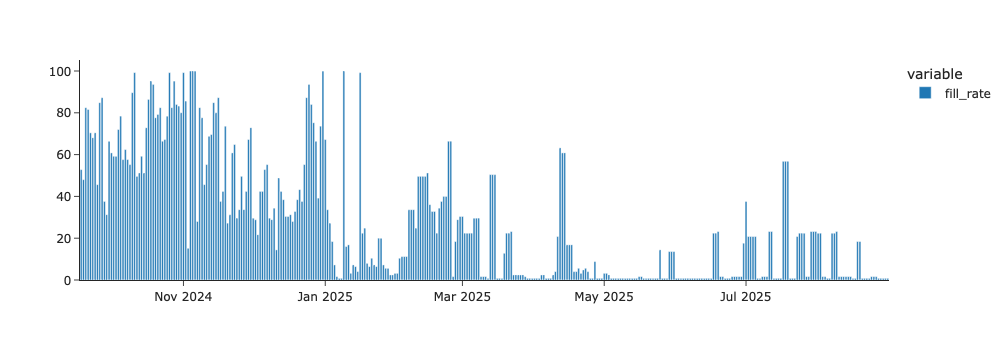

In [187]:
#Show me the occupancy rate in the last day of the period, on 2024-10-18
df = occupancy[['subject_date', 'fill_rate']].iloc[10440:10788, :]
df
#Visualize
bar = px.bar (df, x = 'subject_date', y=['fill_rate'],  template = 'simple_white')

bar.update_layout(xaxis_title=None, yaxis_title=None)

bar.show()

### Analysis of campaigns

- data for campaigns are on these tables: session, datepickers, dailyusers
- the session table can be connected to the search table from where you can know which search resulted in booking
- search_EUR table: search table converted by HUF/EUR: search_EUR.to_csv('/Users/hb/Documents/Morgens/Data/HOTEL_1/Original_data/search_EUR.csv')
- 

#### Daily users table

In [191]:
#daily_users tábla: from which source how many users arrived to the hotel's website
daily_users = pd.read_csv('./../Morgens_notebooks/HOTEL_2/Original_data/website_daily_users_hotel_2.csv', sep=";", encoding='latin-1')
#datatype change to date
daily_users['date'] = pd.to_datetime(daily_users['date'])

In [193]:
#Before dropping of rows
len(daily_users)

1626

In [195]:
#Before dropping of rows
daily_users['utm_campaign'].unique()

array(['(not set)', '(organic)', '(direct)', 'HU | pMAX | PERF I Brand',
       'HU | GSN | PERF I Brand', 'AT | pMAX Hotel | PERF I Brand',
       'campaign_17', 'HU | GSN | PERF I Lokáció',
       'HU | GSN | PERF I Brand 2', 'campaign_18',
       'DE | pMAX Hotel | PERF I Brand', 'campaign_33',
       'AT | GSN | PERF I Brand', '(referral)', 'campaign_3',
       'campaign_19', 'campaign_27', 'CZ | pMAX | PERF I Brand',
       'campaign_2', 'HU | GSN | Brand 2024',
       "HU | GDN | ENGM I Programok '24", 'proposal-by-phone',
       'AT | GSN | PERF | Lokáció', 'campaign_20', 'campaign_7',
       'DE | GSN | Brand 2024', 'campaign_21', 'AT | GSN | Brand',
       'AT | GSN | Brand 2024', 'campaign_9', 'CZ | GSN | PERF I Brand',
       'campaign_22', 'HU | pMAX | Csomag', 'campaign_23', 'hirlevel_c1',
       'campaign_14', 'DE | GSN | PERF I Brand', 'campaign_13',
       'loyalty-email', 'campaign_8', 'DE | GSN | PERF I Lokáció',
       'campaign_24', 'campaign_25', 'campaign_26', 'fe

In [90]:
#THESE ARE FOR HOTEL 1:
#Delete those lines which DO NOT refer to a campaign or a 'hirlevel':
indexCampaign = daily_users[(daily_users['utm_campaign'] == '(not set)') | (
    daily_users['utm_campaign'] == '(not set)') | (
    daily_users['utm_campaign'] == '(direct)') | (
    daily_users['utm_campaign'] == '(organic)') | (
    daily_users['utm_campaign'] == '(referral)') | (
    daily_users['utm_campaign'] == 'proposal-by-phone') | (
    daily_users['utm_campaign'] == '(not+set)') | (
    daily_users['utm_campaign'] == 'HU') | (
    daily_users['utm_campaign'] == 'teszt') | (
    daily_users['utm_campaign'] == 'linktree') | (
    daily_users['utm_campaign'] == 'AT') ].index
daily_users.drop(indexCampaign, inplace=True)

In [91]:
#After dropping
len(daily_users)

860

In [92]:
#After dropping
daily_users['utm_campaign'].unique()

array(['campaign_14', 'hu_brand', 'campaign_15', 'campaign_16',
       'campaign_17', 'hu_pmax_brand', 'campaign_18', 'campaign_19',
       'campaign_20', 'campaign_2', 'campaign_22', 'campaign_21',
       'campaign_24', 'campaign_23', 'campaign_25', 'campaign_36',
       'campaign_9', 'campaign_26', 'campaign_28', 'utm_campaign',
       'campaign_27', 'campaign_37', 'campaign_30', 'campaign_29',
       'campaign_13', 'campaign_33', 'hirlevel_c3', 'campaign_8',
       'campaign_31', 'campaign_6', 'campaign_32', 'campaign_4',
       'campaign_34', 'campaign_38', 'campaign_39', 'campaign_35',
       'campaign_40', 'campaign_1', 'campaign_41', 'campaign_7',
       'campaign_58', 'loyalty-email', 'campaign_44', 'campaign_42',
       'campaign_43', 'campaign_45', 'campaign_46', 'campaign_47',
       'campaign_48', 'hirlevel_c6', 'hirlevel_c9', 'campaign_51',
       'hirlevel_c5', 'campaign_53', 'campaign_54', 'hirlevel_c10',
       'campaign_55', 'campaign_57', 'campaign_56'], dtype=object)

In [93]:
pivot_daily_users_campaign = daily_users.pivot_table(
    index='date',          # Rows: unique dates
    columns='utm_campaign', # Columns: categories in the "source" column
    values='user_count',   # Values: sum of user_count
    aggfunc='sum',         # Aggregation: sum
    fill_value=0           # Replace NaN with 0 for missing values
)

In [94]:
pivot_daily_users_campaign.columns

Index(['campaign_1', 'campaign_13', 'campaign_14', 'campaign_15',
       'campaign_16', 'campaign_17', 'campaign_18', 'campaign_19',
       'campaign_2', 'campaign_20', 'campaign_21', 'campaign_22',
       'campaign_23', 'campaign_24', 'campaign_25', 'campaign_26',
       'campaign_27', 'campaign_28', 'campaign_29', 'campaign_30',
       'campaign_31', 'campaign_32', 'campaign_33', 'campaign_34',
       'campaign_35', 'campaign_36', 'campaign_37', 'campaign_38',
       'campaign_39', 'campaign_4', 'campaign_40', 'campaign_41',
       'campaign_42', 'campaign_43', 'campaign_44', 'campaign_45',
       'campaign_46', 'campaign_47', 'campaign_48', 'campaign_51',
       'campaign_53', 'campaign_54', 'campaign_55', 'campaign_56',
       'campaign_57', 'campaign_58', 'campaign_6', 'campaign_7', 'campaign_8',
       'campaign_9', 'hirlevel_c10', 'hirlevel_c3', 'hirlevel_c5',
       'hirlevel_c6', 'hirlevel_c9', 'hu_brand', 'hu_pmax_brand',
       'loyalty-email', 'utm_campaign'],
      dtype='

In [95]:
daily_users['user_count'].sum() #20793

20793

In [96]:
#total user_count sum=  20793
campaigns_sum = []
for i in range(1, len(pivot_daily_users_campaign.columns)):
    campaigns_sum.append(pivot_daily_users_campaign.iloc[:,i].sum())



In [97]:
pivot_daily_users_campaign.columns

Index(['campaign_1', 'campaign_13', 'campaign_14', 'campaign_15',
       'campaign_16', 'campaign_17', 'campaign_18', 'campaign_19',
       'campaign_2', 'campaign_20', 'campaign_21', 'campaign_22',
       'campaign_23', 'campaign_24', 'campaign_25', 'campaign_26',
       'campaign_27', 'campaign_28', 'campaign_29', 'campaign_30',
       'campaign_31', 'campaign_32', 'campaign_33', 'campaign_34',
       'campaign_35', 'campaign_36', 'campaign_37', 'campaign_38',
       'campaign_39', 'campaign_4', 'campaign_40', 'campaign_41',
       'campaign_42', 'campaign_43', 'campaign_44', 'campaign_45',
       'campaign_46', 'campaign_47', 'campaign_48', 'campaign_51',
       'campaign_53', 'campaign_54', 'campaign_55', 'campaign_56',
       'campaign_57', 'campaign_58', 'campaign_6', 'campaign_7', 'campaign_8',
       'campaign_9', 'hirlevel_c10', 'hirlevel_c3', 'hirlevel_c5',
       'hirlevel_c6', 'hirlevel_c9', 'hu_brand', 'hu_pmax_brand',
       'loyalty-email', 'utm_campaign'],
      dtype='

In [98]:
[['campaign_14', 'campaign_15', 'campaign_16', 'campaign_17', 'campaign_18','campaign_20', 'hu_brand', 'hu_pmax_brand']]

[['campaign_14',
  'campaign_15',
  'campaign_16',
  'campaign_17',
  'campaign_18',
  'campaign_20',
  'hu_brand',
  'hu_pmax_brand']]

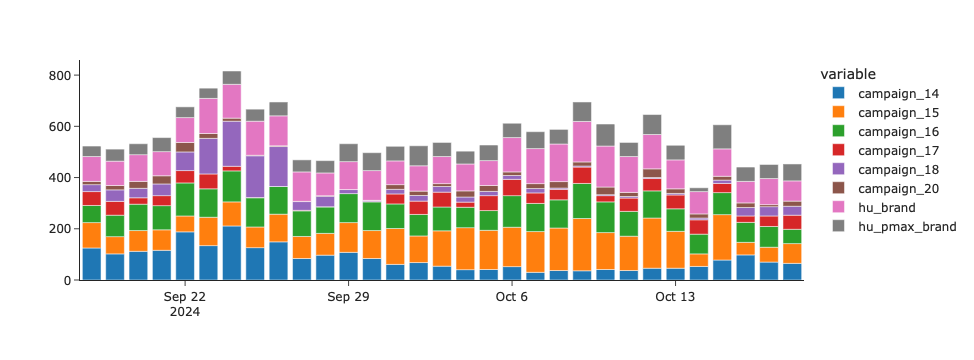

In [99]:
#Visualize the user_count of campaign in the daily user table: only the significant campaigns

bar = px.bar (pivot_daily_users_campaign, x=pivot_daily_users_campaign.index, y=['campaign_14',
                                                                                 'campaign_15',
                                                                                'campaign_16',
                                                                                'campaign_17',
                                                                                'campaign_18',
                                                                                'campaign_20',
                                                                                'hu_brand',
                                                                                'hu_pmax_brand'],
            template = 'simple_white') 
                                                      
bar.update_layout(xaxis_title=None, yaxis_title=None)
bar.show()

#### Datepickers table

In [209]:
#datepickers in the period of 31 days
datepickers = pd.read_csv('./../Morgens_notebooks/HOTEL_2/Original_data/datepicker_daily_visitors_hotel_2.csv', sep=";", encoding='latin-1')
datepickers['date'] = pd.to_datetime(datepickers['date'])

In [102]:
datepickers['utm_campaign'].unique()

array(['(direct)', '(not set)', '(organic)', 'hu_brand', 'campaign_16',
       'campaign_14', 'campaign_15', '(referral)', 'campaign_19',
       'hu_pmax_brand', 'campaign_17', 'campaign_18', 'campaign_26',
       'campaign_22', 'campaign_20', 'campaign_23', 'campaign_28',
       'campaign_24', 'campaign_8', 'campaign_31', 'campaign_32',
       'campaign_30', 'campaign_25', 'campaign_4', 'campaign_33',
       'campaign_34', 'campaign_21', 'hirlevel_c3', 'utm_campaign',
       'campaign_2', 'proposal-by-phone', 'campaign_9', 'campaign_29',
       'campaign_41', 'campaign_27', 'campaign_13', 'campaign_44',
       'campaign_7', 'campaign_45', 'campaign_43', 'campaign_42',
       'hirlevel_c6', 'loyalty-email', 'campaign_35', 'hirlevel_c9',
       'campaign_53', 'hirlevel_c5', 'campaign_54', 'campaign_38',
       'teszt', '(not+set)', 'AT', 'hirlevel_c10', 'campaign_51',
       'campaign_56', 'campaign_57'], dtype=object)

#### Booking and session table

In [204]:
#booking and session table
session = pd.read_csv('./../Morgens_notebooks/HOTEL_2/Original_data/search_log_session_hotel_2.csv', sep=";")
booking_search = pd.read_csv('./../Morgens_notebooks/HOTEL_2/Clean_data/booking_search.csv', index_col = [0])

In [105]:
#if the utm_medium == cpc, than utm_campaign=campaign
session[session['utm_medium'] != 'cpc'].head(50) #if the utm_medium == cpc, than utm_campaign=campaign
for i in range(len(session)):
    if session.iloc[i, 4] == 'cpc':
        session.iloc[i, 5] = 'campaign'
 

In [106]:
session['utm_campaign'].unique()

array(['(not set)', 'campaign', 'campaign_4', 'campaign_8',
       'proposal-by-phone', 'campaign_2', 'campaign_7', '(not+set)',
       'loyalty-email', 'hirlevel_c2', 'campaign_3', 'hirlevel_c3',
       'hirlevel_c4', 'hirlevel_booster10.08', 'feliratkozas_hu',
       'hirlevel_c5', 'hirlevel_c6', 'hirlevel_c7', 'hirlevel_c8'],
      dtype=object)

In [107]:
session.head(1)

id                   uuid  session_id utm_source utm_medium utm_campaign
0  4034  1145549807.1726611234  1726611549        NaN        NaN    (not set)

In [108]:
booking_search.head(1)

search_log_id  rooms_total_price  upsell_total_price  vouchers_total_price  \
0         112857           119952.2              3500.0                     0   

   loyalty_discount_total  search_log_session_id lang_code currency  \
0                 11995.2                   4205        hu      HUF   

      arrival   departure  days  nights  adults  children    utc_date  \
0  2025-02-13  2025-02-15     3       2       2         0  2024-09-18   

   Rate_EUR  total_price_HUF  
0    394.47          99683.0

In [109]:
#join the two tables

booking_session = pd.merge(booking_search, session, left_on='search_log_session_id', right_on='id')
booking_session.head(50)

search_log_id  rooms_total_price  upsell_total_price  \
0          112857           119952.2              3500.0   
1          112906           377114.4                 0.0   
2          113050           312877.8                 0.0   
3          113057           452160.0                 0.0   
4          113070           167843.3                 0.0   
5          113105           104700.6                 0.0   
6          113134           281520.0                 0.0   
7          113151           168912.2                 0.0   
8          113152           288206.0                 0.0   
9          113256           248121.6                 0.0   
10         113302           143354.8                 0.0   
11         113311           142571.2                 0.0   
12         113308           193764.4                 0.0   
13         113432           282243.3                 0.0   
14         113696           369107.8                 0.0   
15         113840            92498.9                 0.0   
16         113877           331200.0                 0.0   
17         113894           104480.0                 0.0   
18         113912           288525.7                 0.0   
19         113917           106855.6                 0.0   
20         113950            67130.1                 0.0   
21         113963           198613.0                 0.0   
22         113992           224634.4                 0.0   
23         114000           113524.6                 0.0   
24         114033            71634.4              4800.0   
25         114046           558895.2                 0.0   
26         114059            78588.9                 0.0   
27         114104           170417.2                 0.0   
28         114145           734400.0                 0.0   
29         114148           771120.0                 0.0   
30         114170           267840.0                 0.0   
31         114241           372596.8                 0.0   
32         114256           106962.1                 0.0   
33         114271           239519.7                 0.0   
34         114274           169186.7                 0.0   
35         114289           407237.8                 0.0   
36         114335           292536.5                 0.0   
37         114358            65201.2                 0.0   
38         114367           361080.0              3500.0   
39         114645           662400.0                 0.0   
40         114646           220320.0                 0.0   
41         114650           205020.0                 0.0   
42         114780           277111.8                 0.0   
43         114812           181025.0                 0.0   
44         114825            86935.6                 0.0   
45         114830           556705.1                 0.0   
46         114851           129722.8                 0.0   
47         115003           373680.0                 0.0   
48         115031           201593.0                 0.0   
49         115060           458596.7                 0.0   

    vouchers_total_price  loyalty_discount_total  search_log_session_id  \
0                      0                 11995.2                   4205   
1                      0                 37711.4                   4234   
2                      0                 46930.1                   4302   
3                      0                 45216.0                   4315   
4                      0                 27515.3                   4321   
5                      0                 11505.6                   4339   
6                      0                 28152.0                   4353   
7                      0                 16891.2                   4359   
8                      0                 31671.0                   4362   
9                      0                 24812.2                   4420   
10                     0                 23500.8                   4452   
11                     0                 15

In [110]:
len(booking_session[booking_session['utm_campaign'] == 'campaign_2'])

4

In [111]:
booking_session['utm_campaign'].unique()

array(['(not set)', 'campaign', 'proposal-by-phone', 'campaign_4',
       'loyalty-email', 'campaign_7', '(not+set)', 'hirlevel_c5',
       'campaign_2'], dtype=object)

In [112]:
#session table
#these are google campaigns
len(session[session['utm_campaign'] == 'hu_pmax_brand']) #1091
len(session[session['utm_campaign'] == 'hu_brand']) #3028

0

#Questions from Morgens QandA:
- Mi befolyásolja a foglalások dinamikáját?
- Milyem kampányból nem jutnak el a booking enginebe?
- Kik azok aki eljutnak?
- Milyen hatékonyságú a megtérülése ezeknek a kampányoknak?
- Milyen időszakokra kerestek ebben a 31 napban?
- Mi lehet az okda, ha egy időszakra sokan keresnek, de nem érkezik rá foglalás?
- A napi költés változása milyen hatással van a keresésekre és a foglalásokra napi szinten?
- Melyik csatorna járul hozzá a legjobban a bevételhez?
- Melyik kampány teljesített a legjobban?
- vevői szegmentációs szempontok: gyerek/gyerektelen, magyar/külföldi, tartózkodás hossza alapján, upsell alapján,